# Sales Report Analysis

In this analysis, our goal is to gain comprehensive insights into the sales data provided. By examining various aspects such as customer behavior,
product performance, shipping costs, and discount impacts, we aim to uncover patterns and trends that can inform strategic business decisions.
This exploratory data analysis (EDA) helps identify key areas for improvement, potential opportunities for growth, and factors influencing sales 
and profit. Ultimately, the insights derived from this analysis can guide marketing strategies, inventory management, customer retention efforts, 
and overall business optimization.

Lets start by exploring the data in "Superstore_USA.xlsx" file. I'll load the dataset and provide an overview to identify some potential areas for
Exploratory Data Analysis (EDA). Let's begin by examining the structure of the dataset.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [5]:
pd.set_option("display.max_columns",24)

In [6]:
dataset = pd.read_excel("Superstore_USA.xlsx")

In [7]:
dataset.head(4)

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,Product Name,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,Avery 49,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.32,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,SANFORD Liquid Accent™ Tank-Style Highlighters,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.56,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,Xerox 1968,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.64,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,Acme® Preferred Stainless Steel Scissors,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.51,7,41.64,88523


In [8]:
dataset.shape

(9426, 24)

#  Data Cleaning and Preprocessing

In [9]:
#Extracted the year values specifically from the "Order Date" column

dataset["Order Year"]=dataset['Order Date'].dt.year

In [37]:
dataset.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
Order Year              0
Year-Month              0
dtype: int64

In [50]:
#Replaced the null values with the mean values in the "Product Based Margin"

dataset['Product Base Margin'] = dataset['Product Base Margin'].fillna(dataset['Product Base Margin'].mean())

In [12]:
dataset['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [13]:
#Replaced the spaced elements

dataset['Order Priority']=dataset['Order Priority'].replace("Critical ","Critical")

In [14]:
dataset.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,Product Sub-Category,Product Container,...,Product Base Margin,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID,Order Year
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,Labels,Small Box,...,0.36,Central,Illinois,Addison,60101,2012-05-28,2012-05-30,1.3200,2,5.90,88525,2012
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Pens & Art Supplies,Wrap Bag,...,0.54,West,Washington,Anacortes,98221,2010-07-07,2010-07-08,4.5600,4,13.01,88522,2010
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,Paper,Small Box,...,0.37,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-47.6400,7,49.92,88523,2011
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,"Scissors, Rulers and Trimmers",Small Pack,...,0.56,West,Washington,Anacortes,98221,2011-07-27,2011-07-28,-30.5100,7,41.64,88523,2011
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,Telephones and Communication,Small Box,...,0.59,West,Washington,Anacortes,98221,2011-07-27,2011-07-27,998.2023,8,1446.67,88523,2011


# Sales and Profit Analysis

In [15]:
#dataset['State or Province'].value_counts()[:5]

<Axes: xlabel='Product Category', ylabel='Profit'>

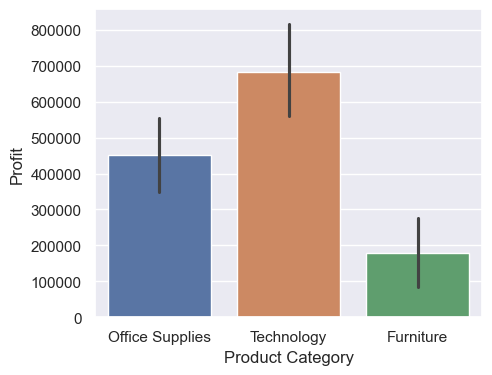

In [61]:
plt.figure(figsize=(5,4))
sns.barplot(x="Product Category",y="Profit",data=dataset,estimator='sum',palette='deep')

*This BAR GRAPH shows that Technology Products are giving the most profit, followed by Office Supplies and least profit comes from Furniture*

In [17]:
dataset['Order Year'].value_counts()

Order Year
2013    3054
2012    2241
2011    2179
2010    1952
Name: count, dtype: int64

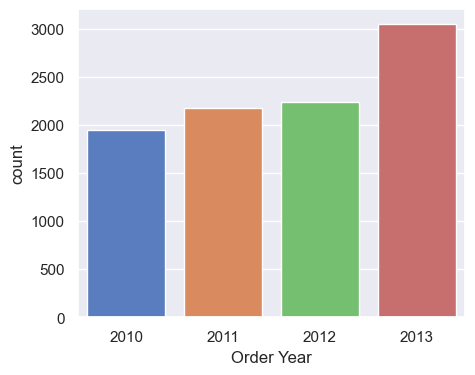

In [63]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Year",data=dataset,palette='muted')
plt.show()

*The Count Plot shows that Order counts are increasing by year after year. Year 2013 has most number of Order counts followed by 2012, 2011 & 2010*

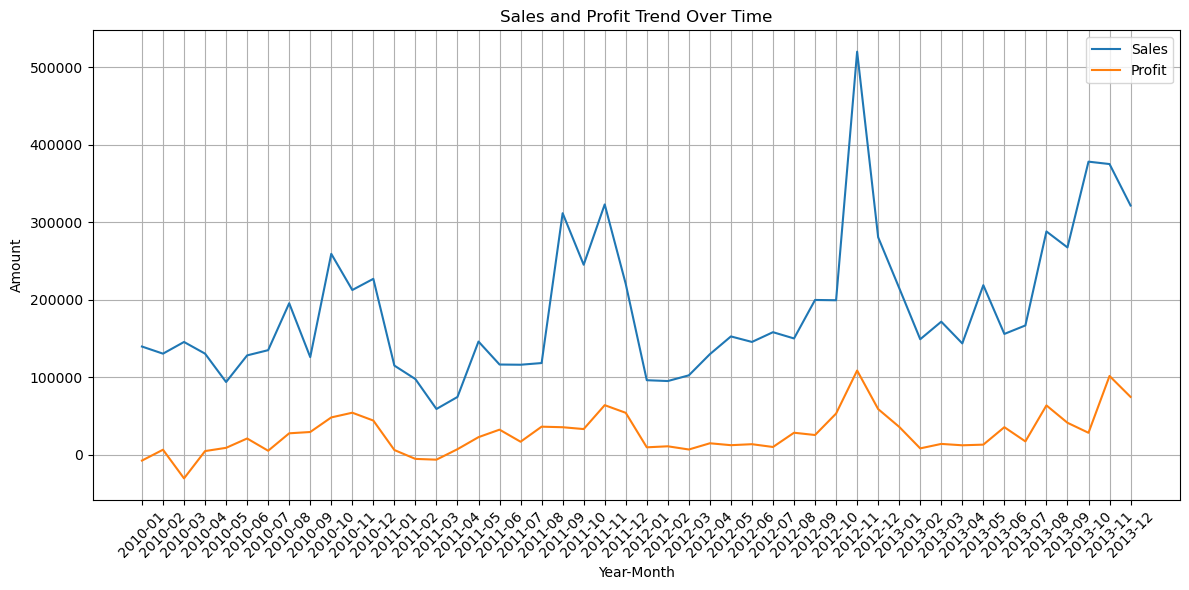

In [19]:
dataset['Year-Month'] = dataset['Order Date'].dt.to_period('M')

trend = dataset.groupby('Year-Month')[['Sales', 'Profit']].sum().reset_index()

trend['Year-Month'] = trend['Year-Month'].astype(str)

plt.figure(figsize=(12, 6))

sns.lineplot(x='Year-Month', y='Sales', data=trend, label='Sales')
sns.lineplot(x='Year-Month', y='Profit', data=trend, label='Profit')

plt.title("Sales and Profit Trend Over Time")
plt.xlabel('Year-Month')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

*This Plot shows sales and profit trend over time.We can see that the the maximum sales and profit are in the year 2012 in october month*

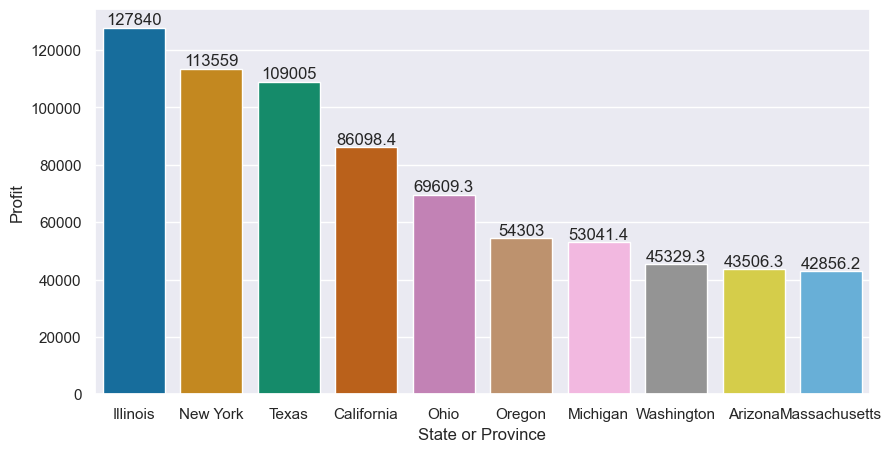

In [64]:
plt.figure(figsize=(10, 5))
df1=dataset.groupby(["State or Province"], as_index=False)[["Profit"]].sum().sort_values(by="Profit", ascending=False).head(10)
contain=sns.barplot(x="State or Province", y="Profit", data=df1,palette='colorblind')
for bars in contain.containers:
    contain.bar_label(bars)

*The Visualization shows the Profit trend with respect to States*

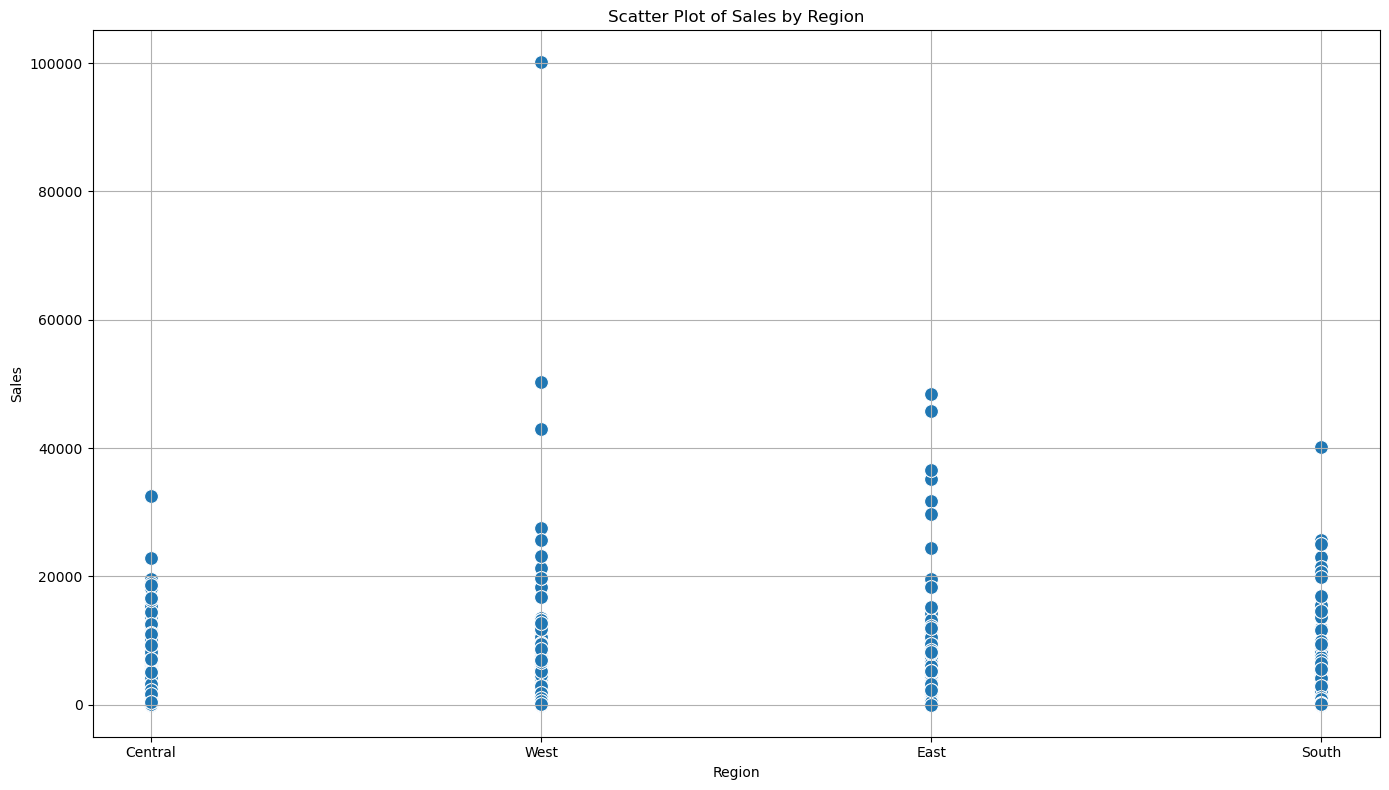

In [21]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='Region', y='Sales', data=dataset, s=100)

plt.title('Scatter Plot of Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()

*This graph shows Region wise Sales*

# Shipping Analysis

In [22]:
dataset['Ship Mode'].value_counts()

Ship Mode
Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: count, dtype: int64

In [23]:
x = dataset['Ship Mode'].value_counts().index
y = dataset['Ship Mode'].value_counts().values

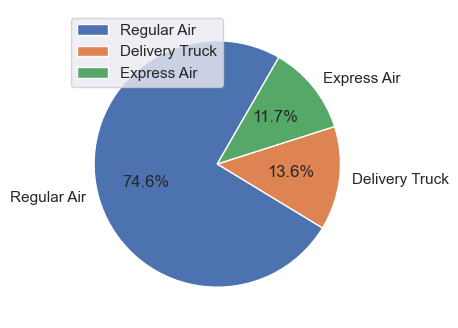

In [70]:
plt.figure(figsize=(5,4))
plt.pie(y,labels=x,startangle = 60,autopct="%0.1f%%")
plt.legend(loc=2)

*The Visualization shows that 'Regular Air' medium contributes in the most percentage of product shipping, followed by 'Delivery Truck' and 'Express Air'*

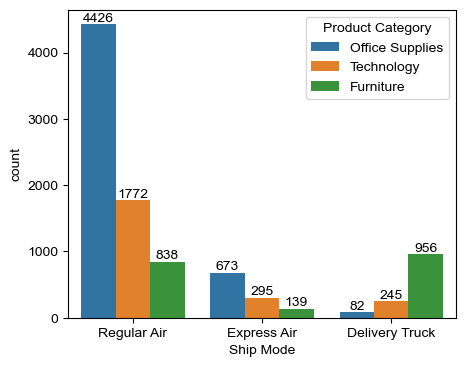

In [25]:
plt.figure(figsize=(5,4))
contain2=sns.countplot(x="Ship Mode",data=dataset,hue="Product Category")
for bars in contain2.containers:
    contain2.bar_label(bars)
sns.set(rc={"figure.figsize":(5,45)})

*The Visualization shows that most number of Office Supplies and Technology Products are deliverd by Regular Air whereas most number of Furniture Products are delivered by Delivery Truck*

# Product Analysis

<Axes: xlabel='Product Category', ylabel='count'>

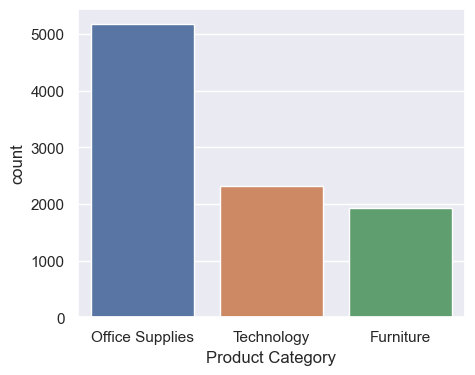

In [71]:
plt.figure(figsize=(5,4))
sns.countplot(x="Product Category",data=dataset,palette='deep')

*This Graph shows that Office Supplies Products are orderd most of the time*

<Axes: xlabel='Product Category', ylabel='count'>

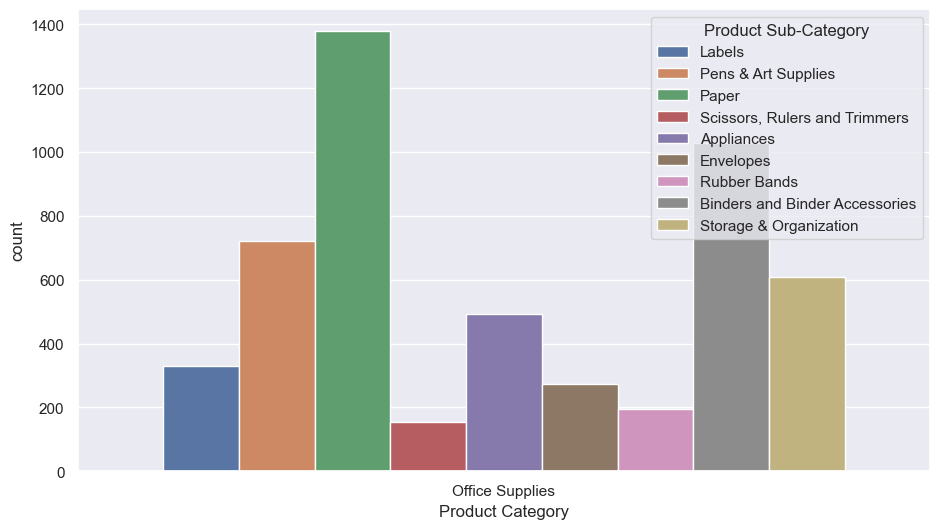

In [27]:
plt.figure(figsize=(11,6))
sns.countplot(x="Product Category",data=dataset[dataset["Product Category"]=="Office Supplies"],hue="Product Sub-Category")

*This Graph shows that most orderd product under Office Supplies*

# Customer Analysis

<Axes: xlabel='Customer Segment', ylabel='count'>

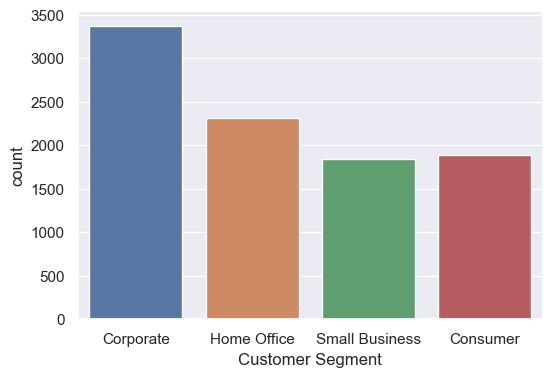

In [72]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Segment",data=dataset,palette='deep')

*This Graph shows that customers from Corporate Sector have orderd the most. The least number of orders have been placed by customers of Small Bussiness*

# Order Priority

In [29]:
#dataset['Order Priority'].value_counts()

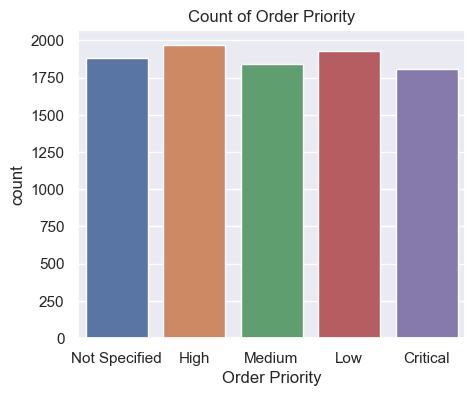

In [73]:
plt.figure(figsize=(5,4))
sns.countplot(x="Order Priority",data=dataset,palette='deep')
plt.title("Count of Order Priority")
plt.savefig("Count of Order Priority.jpg")

*The Graph shows that the orders under High priority have most number of counts*

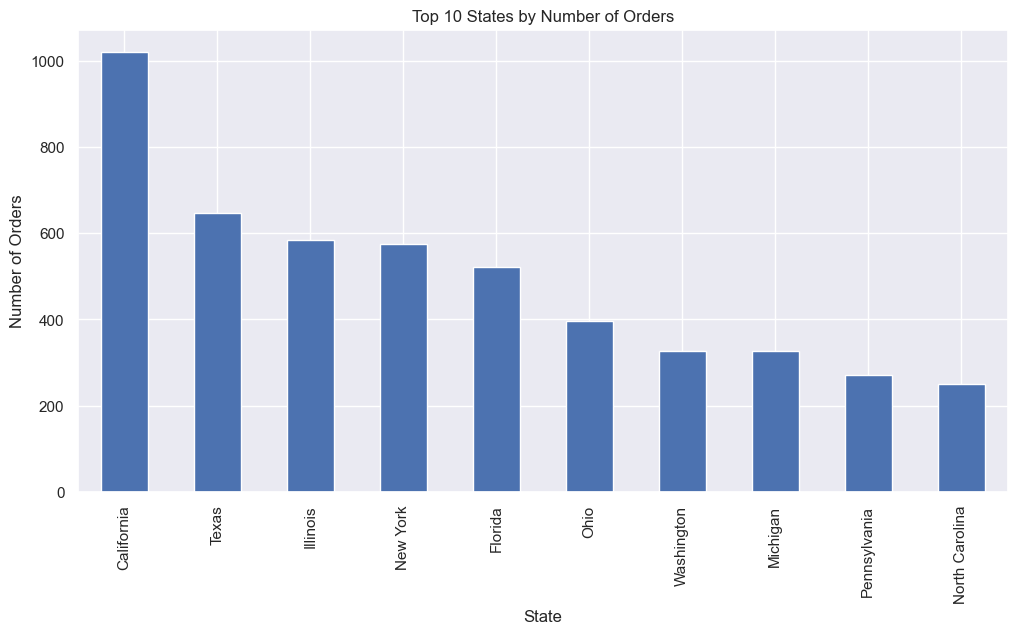

In [31]:
orders_by_state = dataset['State or Province'].value_counts()

plt.figure(figsize=(12, 6))
orders_by_state.head(10).plot(kind='bar')
plt.title('Top 10 States by Number of Orders')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.show()


*The graph shows the top 10 States with number of order counts*

# Discount Impact on Sales and Profit

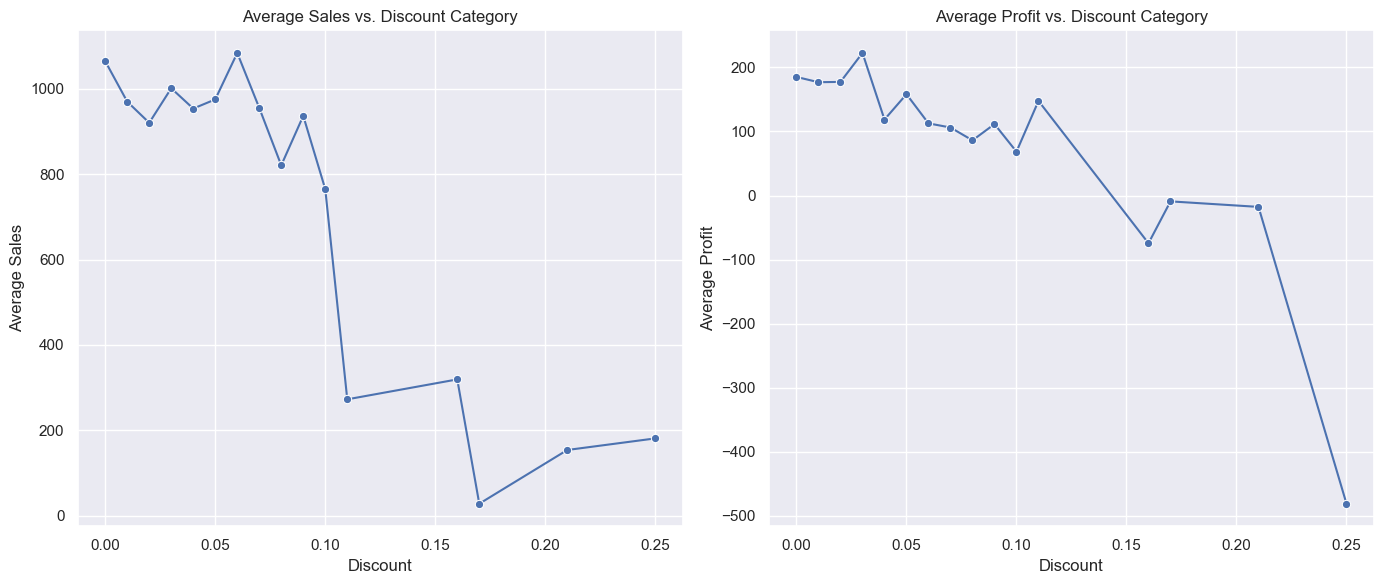

In [32]:
discount_summary = dataset.groupby('Discount').agg({
    'Sales': 'mean',
    'Profit': 'mean'
}).reset_index()

# Plotting line charts for Sales and Profit by Discount Category
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x='Discount', y='Sales', data=discount_summary, marker='o')
plt.title('Average Sales vs. Discount Category')
plt.xlabel('Discount')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2)
sns.lineplot(x='Discount', y='Profit', data=discount_summary, marker='o')
plt.title('Average Profit vs. Discount Category')
plt.xlabel('Discount')
plt.ylabel('Average Profit')

plt.tight_layout()
plt.show()

*The line Garph shows relation of Sales and Profit with respect to Discount*